# How to generate random numbers drawn from a discrete power-law distribution?

The following notes are from Appendix D of:<br>
Clauset, A., Shalizi, C. R., & Newman, M. E. J. (2007). Power-law distributions in empirical data. SIAM Review, 51(4), 43. https://doi.org/10.1109/ICPC.2008.18

### What is a discrete power-law distribution?

Need to write stuff here...

Hurwitz zeta function:
$$ \zeta(\alpha, q) = \sum \limits_{n=0}^{\infty} = (n + q)^{-\alpha} $$

First, generate set of random real numbers $r$ that are uniformaly distributed in the interval $[0, 1)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import zeta

In [2]:
def DiscretePowerLaw_CDF(x, alpha, xmin):
    P = zeta(alpha, x)/zeta(alpha, xmin)
    return(P)

In [3]:
xmin = 7
alpha = 2.5

In [4]:
r_List = np.random.uniform(low=0.0, high=1.0, size=1000)

In [5]:
NumBins_r = 10
MyBins_r = np.linspace(0, 1, NumBins_r+1)

r_hist, r_bins = np.histogram(r_List, bins=MyBins_r, density=True)

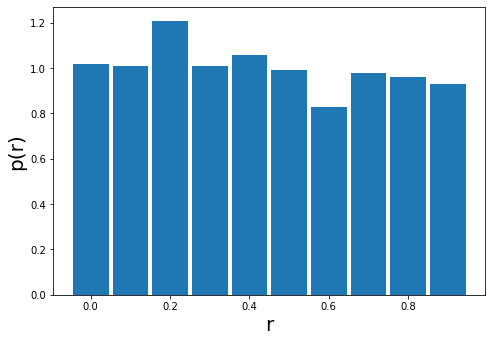

In [6]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar( r_bins[:-1], r_hist, width=0.9*(MyBins_r[1] - MyBins_r[0]) )

ax.set_xlabel("r", fontsize=20)
ax.set_ylabel("p(r)", fontsize=20)

plt.show()

In [7]:
%%time
x_List = []
for r in r_List:
    
    x1 = xmin
    x2 = 2*x1
    cdf = DiscretePowerLaw_CDF(x2, alpha, xmin)

    while cdf>1-r:
        x1 = x2
        x2 = 2*x1
        cdf = DiscretePowerLaw_CDF(x2, alpha, xmin)
    #-----
    x_line = np.arange(x1, x2, 1)

    for ii in range(len(x_line)-1):
        x_left = x_line[ii]
        fn_left = DiscretePowerLaw_CDF(x_left, alpha, xmin) - 1 + r

        x_right = x_line[ii+1]
        fn_right = DiscretePowerLaw_CDF(x_right, alpha, xmin) - 1 + r

        if fn_left*fn_right<0:
            break
    x_List.append(x_left)

CPU times: user 231 ms, sys: 5.78 ms, total: 237 ms
Wall time: 249 ms


In [8]:
print(min(x_List), max(x_List))

7 1454


In [9]:
MyBins_x = np.arange(min(x_List), max(x_List)+1, 1)

In [10]:
x_hist, x_bins = np.histogram(x_List, bins=MyBins_x, density=True)

In [11]:
px_theory = (x_bins[:-1])**(-alpha) / zeta(alpha, xmin)

PlotYlim_bottom = (sorted(set(x_hist))[1] - sorted(set(x_hist))[0])/2

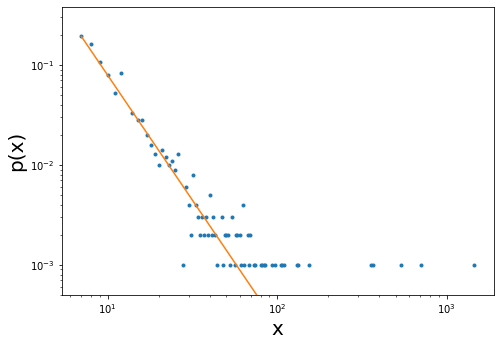

In [12]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot( x_bins[:-1], x_hist, ".")
ax.plot( x_bins[:-1], px_theory, "-")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("p(x)", fontsize=20)

ax.set_ylim(bottom = PlotYlim_bottom)

plt.show()